In [1]:
import pandas as pd
import re

In [2]:
movieData = pd.read_csv('../data/movie.metadata.tsv', sep='\t', header=0, encoding='utf-8',
                        names=["WikipediaID", "FreebaseID", "name", "date", "boxOffice", "runtime",
                               "languages", "countries", "genres"],
                        usecols=["WikipediaID", "name", "date", "languages", "countries", "genres"], index_col=0)

In [3]:
def extractTags(string):
    return re.findall('"([\w\s]+)"', string)

In [4]:
movieData["genres"] = movieData["genres"].apply(extractTags)
movieData["languages"] = movieData["languages"].apply(extractTags)
movieData["countries"] = movieData["countries"].apply(extractTags)

In [5]:
plot = pd.read_csv("../data/plot_summaries.txt", sep='\t', encoding='utf-8', names=["WikipediaID", "synopsis"], index_col=0)

In [6]:
dataset = pd.merge(movieData, plot, left_index=True, right_index=True, how='inner')

In [12]:
dataset.shape

(42203, 6)

In [14]:
genre_set = set()
for i in range(dataset.shape[0]):
    for item in dataset.genres.iloc[i]:
        genre_set.add(item)

In [18]:
from sklearn.preprocessing import FunctionTransformer, MultiLabelBinarizer
binarizer = MultiLabelBinarizer()
y = binarizer.fit_transform(dataset.genres)

In [21]:
import numpy as np
counts = []
categories = binarizer.classes_
for i in range(categories.shape[0]):
    counts.append((categories[i], np.sum(y[:,i])))
df_stats = pd.DataFrame(counts, columns=['genre', '#movies'])

In [30]:
df_stats.sort_values(by=['#movies'], ascending=False)

,genre,#movies
95,Drama,19134
59,Comedy,10467
250,Romance Film,6666
301,Thriller,6529
2,Action,5867
317,World cinema,5153
80,Crime Fiction,4275
160,Horror,4081
166,Indie,3668
7,Adventure,3247


In [35]:
top50 = df_stats.nlargest(100, '#movies')
top50

,genre,#movies
95,Drama,19134
59,Comedy,10467
250,Romance Film,6666
301,Thriller,6529
2,Action,5867
317,World cinema,5153
80,Crime Fiction,4275
160,Horror,4081
166,Indie,3668
7,Adventure,3247


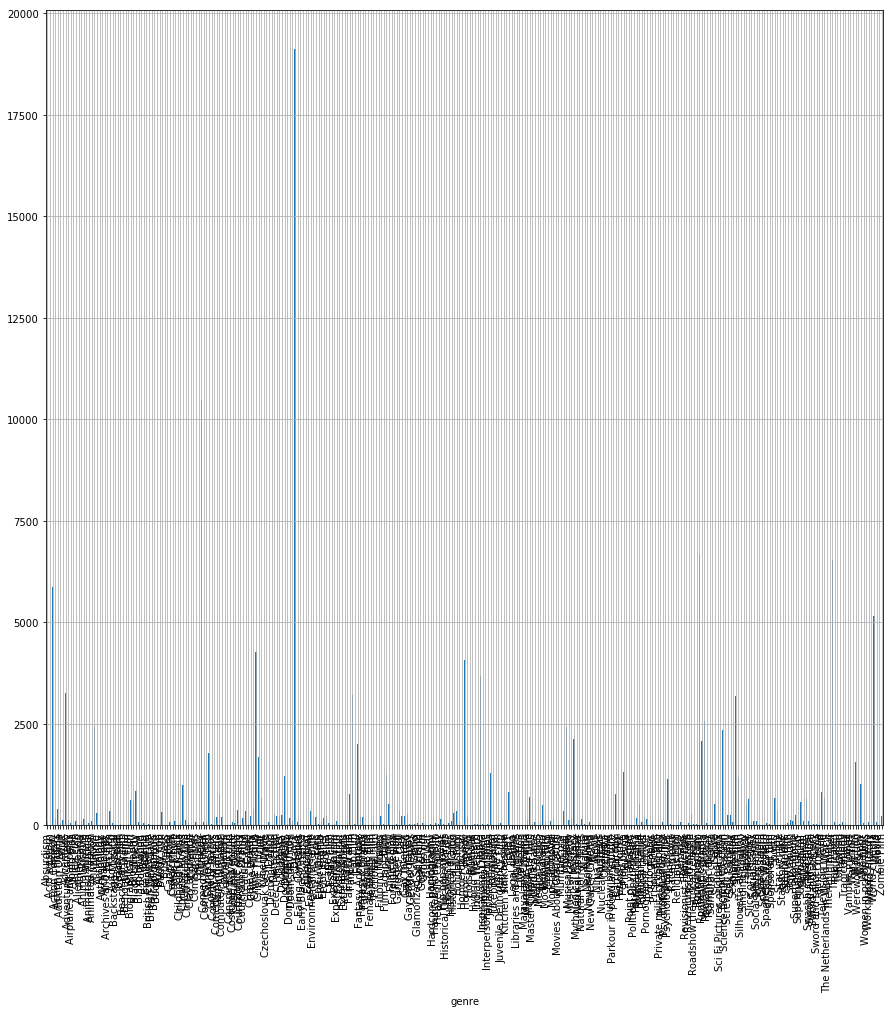

In [27]:
%matplotlib inline
df_stats.plot(x='genre', y='#movies', kind='bar', legend=False, grid=True, figsize=(15, 15))

class wordRemover():
    def __init__(self, word):
        self.word = word
        
    def removeWord(self, listOfWords):
        if self.word in listOfWords:
            index = listOfWords.index(self.word)
            del listOfWords[index]
        return listOfWords

class wordReplacer():
    def __init__(self, word, replacements):
        self.word = word
        self.replacements = replacements
        
    def replaceWord(self, listOfWords):
        if self.word in listOfWords:
            index = listOfWords.index(self.word)
            del listOfWords[index]
            for replacement in self.replacements:
                if replacement not in listOfWords:
                    listOfWords.append(replacement)
        return listOfWords

toDelete = [u'Airplanes and airports', u'Albino bias',u'Americana',u'Animal Picture',u'Animals',u'Anthology', u'Anthropology', u'Archaeology',u'Archives and records',u'Art film', u'Beach Film',u'Beach Party film', u'Bengali Cinema',u'Blaxploitation', u'British Empire Film', u'British New Wave',u'Buddy film',u'Business', u'Camp',u'Cavalry Film', u'Chase Movie', u'Chinese Movies',u'Christmas movie',u'Cold War',u'Coming of age', u'Computers',u'Cult',u'Cyberpunk', u'Dogme 95', u'Doomsday film',u'Early Black Cinema',u'Education', u'Educational', u'Environmental Science',u'Ensemble Film', u'Escape Film', u'Essay Film', u'Existentialism',u'Experimental film', u'Exploitation', u'Expressionism', u'Fan film', u'Feature film', u'Female buddy film', u'Feminist Film', u'Fictional film', u'Filipino', u'Filipino Movies', u'Film', u'Film adaptation',u'Filmed Play', u'Foreign legion',u'Giallo',u'Goat gland', u'Gothic Film',u'Gross out',u'Hagiography', u'Holiday Film', u'Japanese Movies', u'Journalism',u'Jungle Film', u'Juvenile Delinquency Film',
            u'Kafkaesque', u'Latino', u'Libraries and librarians', u'Linguistics',u'Live action',u'Media Studies', u'Mondo film',u'Movie serial',u'Mumblecore',u'Nature',u'New Hollywood', u'News',u'Northern', u'Nuclear warfare', u'Parkour in popular culture',u'Patriotic film', 
            u'Pinku eiga', u'Plague', u'Point of view shot',u'Prison',u'Private military company',u'Propaganda film',u'Reboot', u'Remake', u'Roadshow theatrical release', u'Religious Film',
            u'School story', u'Sexploitation', u'Sponsored film', u'Short Film',u'Singing cowboy', u'Slice of life story',u'Social issues', u'Social problem film', u'Sponsored film', u'Star vehicle',u'Statutory rape', u'Steampunk', u'Stoner film', u'Superhero', u'Surrealism',u'Sword and Sandal', u'Sword and sorcery', u'Sword and sorcery films',  u'Television movie', u'The Netherlands in World War II',u'Tragedy', u'Travel', u'World cinema', u'Wuxia',u'Z movie'] 

toReplace = [(u'Acid western', [u'Western']),(u'Action Comedy', [u'Action', u'Comedy']),(u'Action Thrillers', [u'Action', u'Thriller']),(u'Addiction Drama', [u'Drama']),(u'Adventure Comedy',[u'Adventure', u'Comedy']),(u'Alien Film', [u'Creature Film', u'Science Fiction']),(u'Alien invasion', [u'Creature Film', u'Science Fiction']),(u'Animated Musical', [u'Animation']),(u'Animated cartoon', [u'Animation']),(u'Anime', [u'Animation']),(u'Auto racing', [u'Sports']),(u'Backstage Musical', [u'Musical']),(u'Baseball', [u'Sports']),(u'Biker Film', [u'Road movie']),(u'Biographical film', [u'Biography']),(u'Black comedy', [u'Comedy']),(u'Boxing', [u'Sports']),(u'Breakdance', [u'Dance']),(u'Buddy cop', [u'Crime']),(u'Caper story', [u'Crime', u'Comedy']),(u'Chick flick', [u'Romance']),(u'Childhood Drama',[u'Drama']),(u'Christian film', [u'Religious Film']),(u'Clay animation', [u'Animation']),
             (u'Combat Films', [u'Action']),(u'Comdedy',[u'Comedy']),(u'Comedy Thriller', [u'Comedy', u'Thriller']),(u'Comedy Western', [u'Comedy', u'Western']),(u'Comedy film', [u'Comedy']),(u'Comedy horror', [u'Comedy', u'Horror']),(u'Comedy of Errors', [u'Comedy']),(u'Comedy of manners', [u'Comedy']),(u'Computer Animation', [u'Animation']),(u'Concert film', [u'Music']),(u'Conspiracy fiction', [u'Thriller']),(u'Costume Adventure', [u'Adventure']),(u'Costume Horror', [u'Horror']),(u'Costume drama', [u'Drama']),(u'Courtroom Comedy',[u'Courtroom', u'Comedy']),(u'Courtroom Drama',[u'Courtroom', u'Drama']),(u'Creature Film', [u'Monster']), (u'Crime Comedy', [u'Crime', u'Comedy']),(u'Crime Drama', [u'Crime', u'Drama']),(u'Crime Fiction', [u'Crime']),(u'Crime Thriller', [u'Crime', u'Thriller']),(u'Demonic child', [u'Horror']),(u'Detective fiction', [u'Detective']),(u'Docudrama', [u'Drama']),(u'Domestic Comedy', [u'Comedy']),(u'Ealing Comedies', [u'Comedy']),(u'Epic Western', [u'Epic', u'Western']),(u'Erotic Drama', [u'Adult', u'Drama']),(u'Erotic thriller', [u'Adult', u'Thriller']),(u'Erotica', [u'Adult']),(u'Extreme Sports', [u'Sports']),(u'Family Drama', [u'Family Film', u'Drama']),
             (u'Fairy Tale', [u'Fantasy']),(u'Fairy tale', [u'Fantasy']),(u'Fantasy Adventure', [u'Fantasy', u'Adventure']),(u'Fantasy Comedy', [u'Fantasy', u'Comedy']),(u'Fantasy Drama', [u'Fantasy', u'Drama']),(u'Future noir', [u'Film noir']),(u'Gangster Film', [u'Crime']),(u'Gay', [u'LGBT']),(u'Gay Interest', [ u'LGBT']),(u'Gay Themed', [ u'LGBT']), (u'Gay pornography', [ u'LGBT', u'Adult']),(u'Gender Issues', [u'LGBT']),(u'Glamorized Spy Film', [u'Spy']),
             (u'Gulf War', [u'War film']),(u'Haunted House Film', [u'Horror']),(u'Hardcore pornography', [u'Adult']),(u'Heavenly Comedy', [u'Comedy']),(u'Heist', [u'Crime']),(u'Hip hop movies', [u'Music']),(u'Historical Documentaries', [u'History', u'Documentary']),(u'Historical Epic', [u'History']),(u'Historical drama', [u'History']),(u'Historical Drama', [u'History', u'Drama']),(u'Historical fiction', [u'History']),(u'Homoeroticism', [u'Adult', u'LGBT']),(u'Horror Comedy', [u'Horror', u'Comedy']),(u'Horse racing', [u'Sport']),(u'Humour', [u'Comedy']),(u'Hybrid Western', [u'Western']),(u'Indian Western', [u'Western']),(u'Inspirational Drama', [u'Drama']),(u'Instrumental Music', [u'Music']),(u'Interpersonal Relationships', [u'Drama']),(u'Jukebox musical', [u'Musical']),(u'Legal drama', [u'Courtroom']),(u'Marriage Drama', [u'Drama']),(u'Master Criminal Films', [u'Crime']),(u'Media Satire', [u'Comedy']),
             (u'Melodrama', [u'Drama']),(u'Mockumentary', [u'Comedy']),(u'Monster movie', [u'Monster']),(u'Movies About Gladiators', [u'History', u'Action']),(u'Musical Drama', [u'Musical', u'Drama']),(u'Musical comedy', [u'Musical', u'Comedy']), (u'Mythological Fantasy',[u'Fantasy']),(u'Natural disaster', [u'Disaster']), (u'Natural horror films', [u'Horror']),(u'Ninja movie', [u'Martial Arts Film']),(u'Operetta', [u'Musical']),(u'Outlaw', [u'Crime']),(u'Outlaw biker film', [u'Crime', u'Road movie']),(u'Parody', [u'Comedy']),(u'Period Horror', [u'Period', u'Horror']),(u'Period piece', [u'Period']),(u'Political cinema', [u'Politics']),(u'Political drama', [u'Politics', u'Drama']),(u'Political satire', [u'Politics', u'Comedy']),(u'Political thriller', [u'Politics', u'Thriller']),(u'Pornographic movie', [u'Adult']),(u'Pornography', [u'Adult']),(u'Prison', [u'Crime']),(u'Prison escape', [u'Crime']),(u'Prison film', [u'Crime']),(u'Psychological horror', [u'Horror']),(u'Psychological thriller', [u'Thriller']),
             (u'Punk rock', [u'Music']),(u'Race movie', ['Sports']),(u'Revisionist Fairy Tale', [u'Fantasy']),(u'Revisionist Western', [u'Western']),(u'Rockumentary', [u'Documentary', u'Music']),(u'Romance Film', [u'Romance']),(u'Romantic Film', [u'Romance']),(u'Romantic comedy', [u'Romance', u'Comedy']),(u'Romantic drama', [u'Romance', u'Drama']),(u'Romantic fantasy', [u'Romance', u'Fantasy']),(u'Samurai cinema', [u'Martial Arts Film']),(u'Satire', [u'Comedy']),(u'Sci Fi Pictures original films', [u'Science Fiction']),(u'Science fiction Western', [u'Science Fiction', u'Western']),(u'Screwball comedy', [u'Comedy']),(u'Sex comedy', [u'Comedy']),(u'Slapstick', [u'Comedy']),(u'Slasher', [u'Horror']),(u'Softcore Porn', [u'Adult']),(u'Space opera', [u'Science Fiction', u'Musical']),(u'Space western', [u'Science Fiction', u'Western']),(u'Spaghetti Western', [u'Western']),(u'Spaghetti western', [u'Western']),(u'Splatter film', [u'Horror']),(u'Sport', [ u'Sports']),(u'Stop motion', [u'Animation']),(u'Supermarionation', [u'Animation']),(u'Swashbuckler films', [u'Adventure']),
             (u'Therimin music', [u'Music']), (u'Time travel', [u'Science Fiction']),(u'Tragicomedy', [u'Comedy', u'Tragedy']),(u'Vampire movies', [u'Horror']),(u'War effort', [u'War film']),(u'Werewolf fiction', [u'Monster']),(u'Whodunit', [u'Detective']),(u'Women in prison films', [u'Prison']),(u'World History', [u'History']),(u'Workplace Comedy', [u'Comedy']),(u'Zombie Film', [u'Monster']), (u'Music', [u'Musical'])]

for word, replacements in toReplace:
    dataset.genres = dataset.genres.apply(wordReplacer(word, replacements).replaceWord)

for word in toDelete:
    dataset.genres = dataset.genres.apply(wordRemover(word).removeWord)

In [13]:
from sklearn.preprocessing import FunctionTransformer, MultiLabelBinarizer
binarizer = MultiLabelBinarizer()
y = binarizer.fit_transform(dataset.genres)

In [16]:
binarizer.classes_

array(['Absurdism', 'Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Bollywood', 'Bruceploitation', 'Buddy Picture',
       'Comedy', 'Courtroom', 'Crime', 'Czechoslovak New Wave', 'Dance',
       'Detective', 'Disaster', 'Documentary', 'Drama', 'Dystopia',
       'Epic', 'Family Film', 'Fantasy', 'Film noir', 'History', 'Horror',
       'Indie', 'Kitchen sink realism', 'LGBT', 'Malayalam Cinema',
       'Martial Arts Film', 'Medical fiction', 'Monster', 'Musical',
       'Mystery', 'Neorealism', 'New Queer Cinema', 'Period',
       'Political Documetary', 'Politics', 'Revenge', 'Road movie',
       'Romance', 'Romantic thriller', 'Science Fiction', 'Silent film',
       'Silhouette animation', 'Sports', 'Spy', 'Superhero movie',
       'Supernatural', 'Suspense', 'Tamil cinema', 'Teen', 'Thriller',
       'Tokusatsu', 'Tollywood', 'War film', 'Western'], dtype=object)

In [ ]:
def deleteSynopsisTags(X):
    return X.str.replace("\s*{{\w*}}\s*", "", case=False)


In [21]:
from langdetect import detect
lang_list = []
for i in range(dataset.shape[0]):
    lang_list.append(detect(dataset.iloc[i]["synopsis"]))

lang_df = pd.DataFrame({'lang':lang_list})
lang_df['lang'].value_counts()

NameError: name 'lang_df' is not defined

In [57]:
import numpy as np
counts = []
categories = binarizer.classes_
for i in range(categories.shape[0]):
    counts.append((categories[i], np.sum(y[:,i])))
df_stats = pd.DataFrame(counts, columns=['genre', '#movies'])
df_stats

,genre,#movies
0,Absurdism,79
1,Action,5920
2,Adult,586
3,Adventure,3353
4,Animation,2679
5,Biography,1020
6,Bollywood,1058
7,Bruceploitation,3
8,Buddy Picture,1
9,Comedy,12833
